# Chongqing Bus Data Process
by ywj

---

## Dependancies & Helper Functions
As is described, the following block is the dependencies and helper functions needed for the data processing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_file(filename):
    '''
    NOTE: pretty useless function... the only reason it didnt get deleted was just that I was lazy.
    '''
    ls = []
    with open(filename,'r') as f:
        for line in f:
            words = line.split(',')
            words[8] = words[8][:1]
            ls.append(words)
    data = pd.DataFrame(ls,columns = [
        'card_no','date','time','traffic_type','line_no','bus_no','trade_type','pay','preamt_flag'])
    
    return data

def read_file(i,j):
    '''
    INPUT: starting index int i and ending index int j;
    OUTPUT: a dataFrame from the designated files;
    NOTE: specified for the Chongqing bus data file.
    '''
    for i in range(i,j):
        filename = '2016080'+str(i)+'.txt'
        print('reading file: ',filename)
        if i == 1:
            data = pd.read_table(filename,header = None,sep = ',',
                                names = ['card_no','date','time','traffic_type','line_no','bus_no','trade_type','pay','preamt_flag'],
                                dtype = {'card_no':'str'})
        else:
            data = pd.concat([
                data,pd.read_table(filename,header = None,sep = ',',
                                names = ['card_no','date','time','traffic_type','line_no','bus_no','trade_type','pay','preamt_flag'],
                                dtype = {'card_no':'str'})
                             ], axis=0)
#     data.columns = [
#             'card_no','date','time','traffic_type','line_no','bus_no','trade_type','pay','preamt_flag']
    data.reset_index(drop = True,inplace=True)
    print(data.head())
    return data

def get_dict(filename):
    '''
    NOTE: this func is used to get a dictionary from line no to the correct name of the line/stop.
    '''
    with open(filename,'r',encoding = 'utf8') as f:
        i = 0
        ls = []
        for line in f:
            i = i+1
            if i > 1:
                ls.append(line.split())
        dic = {}
        for i in range(len(ls)):
            dic[ls[i][0]] = ls[i][1]
        return dic
    
def hhmmss2hour(hhmmss):
    '''
    INPUT: hhmmss, an integar that are converted from a string, in 'hour:minute:second' format
    OUTPUT: hour, a float, converting the input to hours
    NOTE: due to the 'read_table' function from pandas that automatically transfer the input string to intergar when creating a dataframe, 
        for instance, from '012604' to 12604, this function now only fits to intergar inputs.
    '''
    # TODO: make this function fit string input.
    hour = int(hhmmss/10000)
    mm = int((hhmmss - hour*10000)/100)
    hour = hour + float(mm/60)
    return hour

# 主要的数据处理部分

以上是pandas库的熟悉、使用部分，~~数据将被存入csv文件中，以供读取~~我也将把所写函数放在以上部分。

以下是数据处理部分

## 数据特征

1. 所有数据的traffic_type均为1，即所有数据都是bus类型的
2. 数据中的line_no无法和文件中的站点代号很好地匹配

## 我打算做什么

- [ ] get the time distribution of the riding number of the top 10 lines
    - [x] get the top 10 lines
    - [x] alter the time format to hours in float
    - [x] get time distribution of each line
    - [x] visualize the result

In [2]:
# load data
print('loading data ...')
data = read_file(1,4)
station_dict = get_dict('轨道站点.txt')
data.drop(columns = 'traffic_type')
# for i in range(len(data)):
#     data['line_no'].loc[i] = station_dict[data['line_no'].loc[i]]

loading data ...
reading file:  20160801.txt
reading file:  20160802.txt
reading file:  20160803.txt
            card_no      date   time  traffic_type  line_no  bus_no  \
0  4000140210013116  20160801   5847             1     3211   31832   
1  4000000088075848  20160801    637             1      301   31227   
2  4000000000452899  20160801  12604             1     3211   31844   
3  4000000211535090  20160801   3753             1     3211   31844   
4  4000000211545482  20160801   1442             1     3211   31844   

   trade_type  pay  preamt_flag  
0           1  1.0            0  
1           1  1.0            0  
2           0  1.8            0  
3           0  1.8            0  
4           0  1.8            0  


,card_no,date,time,line_no,bus_no,trade_type,pay,preamt_flag
0,4000140210013116,20160801,5847,3211,31832,1,1.0,0
1,4000000088075848,20160801,637,301,31227,1,1.0,0
2,4000000000452899,20160801,12604,3211,31844,0,1.8,0
3,4000000211535090,20160801,3753,3211,31844,0,1.8,0
4,4000000211545482,20160801,1442,3211,31844,0,1.8,0
...,...,...,...,...,...,...,...,...
14495225,4000000220332260,20160803,221047,616,6164104,0,3.6,0
14495226,4000000222003100,20160803,222353,616,6164104,0,2.7,0
14495227,4000000222039671,20160803,221942,616,6164102,0,3.6,0
14495228,4000000222079027,20160803,204512,616,6164101,0,2.7,0


In [80]:
# Now to find the top 10 lines with the maximum riding numbers
line_num = data['line_no'].value_counts()
top_10_line = line_num.nlargest(10)
print(top_10_line.head())
top_10_data = data[data['line_no'].isin(top_10_line.index.values)].copy()
print(top_10_data.head())

321    229595
606    164635
318    158171
315    130236
202    124728
Name: line_no, dtype: int64
              card_no      date  time  traffic_type  line_no  bus_no  \
91   4000000212530423  20160801     8             1      606   82614   
92   4000000212704895  20160801    12             1      606   82614   
102  4000000211381775  20160801    14             1      606   82614   
103  4000000000985675  20160801    20             1      606   82614   
104  4000000004419038  20160801     6             1      606   82614   

     trade_type  pay  preamt_flag  
91            0  1.8            0  
92            0  1.8            0  
102           0  1.8            0  
103           0  1.8            0  
104           0  1.8            0  


In [81]:
# Now to alter the time format
for i in range(len(top_10_data)):
    top_10_data.iloc[i,2] = hhmmss2hour(top_10_data.iloc[i,2])

print(top_10_data.head())
print(top_10_data['time'])

              card_no      date  time  traffic_type  line_no  bus_no  \
91   4000000212530423  20160801   0.0             1      606   82614   
92   4000000212704895  20160801   0.0             1      606   82614   
102  4000000211381775  20160801   0.0             1      606   82614   
103  4000000000985675  20160801   0.0             1      606   82614   
104  4000000004419038  20160801   0.0             1      606   82614   

     trade_type  pay  preamt_flag  
91            0  1.8            0  
92            0  1.8            0  
102           0  1.8            0  
103           0  1.8            0  
104           0  1.8            0  
91           0.000000
92           0.000000
102          0.000000
103          0.000000
104          0.000000
              ...    
14493640    18.416667
14493689     7.550000
14493690     7.550000
14493691     7.550000
14493692     7.550000
Name: time, Length: 1365829, dtype: float64


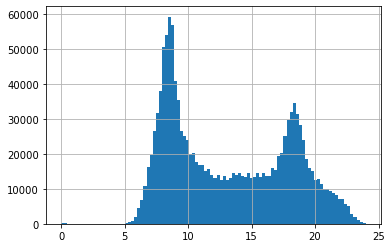

In [82]:
# line_321_data = top_10_data.loc[top_10_data.loc['line_no'] == 321].copy()
# line_321_data.hist(columns = 'time')
ax = top_10_data['time'].hist(bins = 100,grid = True)
ax.figure.savefig('figs/fig1.jpg',dpi=200)

In [8]:
station_no = list(map(int, list(station_dict.keys())))
print(station_no)
new = data.loc[data['line_no'].isin(station_no)].copy()
# print(new.head())
data_station_no = pd.unique(new.iloc[:,4].copy())
print('total station of ',len(station_no),', while data got ',len(data_station_no))
output = ''
for item in station_no:
    if item not in data_station_no:
        output = output + str(item) + " "
print('the stations no. ',output,'are not in the data')

del new, data_station_no, station_no, output

[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 5601, 5602, 5603, 5604, 5605, 5606]
total station of  128 , while data got  124
the stations no.  101 340 344 5601  are not in the data


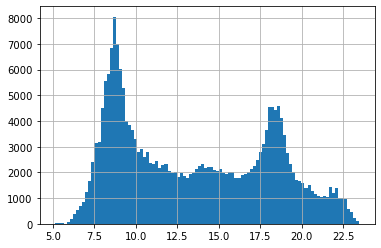

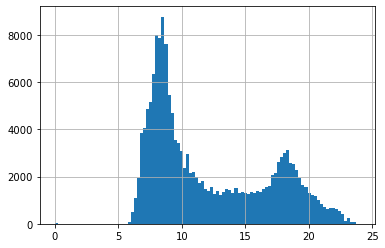

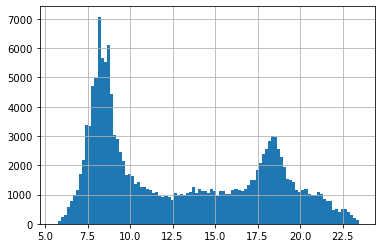

In [14]:
line_321 = data.loc[data['line_no']==321].copy()
for i in range(len(line_321)):
    line_321.iloc[i,2] = hhmmss2hour(line_321.iloc[i,2])
ax = line_321['time'].hist(bins = 100,grid = True)
ax.figure.savefig('figs/line_321.jpg',dpi=200)z
del line_321, ax

plt.figure()
line_606 = data.loc[data['line_no']==606].copy()
for i in range(len(line_606)):
    line_606.iloc[i,2] = hhmmss2hour(line_606.iloc[i,2])
ax = line_606['time'].hist(bins = 100,grid = True)
ax.figure.savefig('figs/line_606.jpg',dpi=200)
del line_606, ax

plt.figure()
line_318 = data.loc[data['line_no']==318].copy()
for i in range(len(line_318)):
    line_318.iloc[i,2] = hhmmss2hour(line_318.iloc[i,2])
ax = line_318['time'].hist(bins = 100,grid = True)
ax.figure.savefig('figs/line_318.jpg',dpi=200)
del line_318, ax
